# B"H

## Setup

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


## Calculating Network Error with Loss

The **loss function** is also referred to as the **cost function**

<br>

---

The output of our neural network is confidence, and more confidence in the correct answer is better. Because of this, we strive to _increase correct confidence_ and _decrease misplaced confidence_.

## Categorical Cross-Entropy Loss

### Intro

Our model has a **softmax activation function** for the _output layer_, which means
it’s outputting a probability distribution. 

**Categorical cross-entropy** is explicitly used to compare a “ground-truth” probability (y or “targets”) and some predicted distribution (y-hat or
“predictions”)

<br><br>

---


![](https://drive.google.com/uc?id=1sk7Zb-OCV3W7vx2a5qQv7HbReTbbMqHZ)

![](https://drive.google.com/uc?id=1qhlJBbRf_oARGJUWPWEgvJpeBnnCfW9b)

<br>

---

Now we’ll simplify it further to `-log(correct_class_confidence)`:

<br>

![](https://drive.google.com/uc?id=15cYt14T0YC8MJftsWwVTSseB2yHbNZwv)

![](https://drive.google.com/uc?id=1Y0wCm90FkvXUrpROnzjix85uXSdVEKJA)

### Example 1

#### Scenario

<br>

---

Let's use the following for an example:

- Softmax output: `[0.7, 0.1, 0.2]` 
- Target probability distribution: `[1, 0, 0]`

Note, cross-entropy can also work on target probability distributions like `[0.2, 0.5, 0.3]`.

When comparing the model’s results to a one-hot vector (as in our case), the other parts of the equation zero out, making the cross-entropy calculation relatively simple. 

This is also a special case of the cross-entropy calculation, called **categorical cross-entropy**. 


In [9]:
import math
import numpy as np

In [2]:
softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]

#### Non Simplified

![](https://drive.google.com/uc?id=1qhlJBbRf_oARGJUWPWEgvJpeBnnCfW9b)

In [7]:
step_1 = [math.log(o[0]) * o[1] for o in zip(softmax_output, target_output)]    

step_1

[-0.35667494393873245, -0.0, -0.0]

In [13]:
loss = - np.array(step_1).sum()

loss

0.35667494393873245

#### Simplified to Negative-Log

That’s the full categorical cross-entropy calculation, but let's simplify it. 

- Anything multiplied by 0 is 0. Thus, we don’t need to calculate these indices. 
- Any number multiplied by 1 remains the same. 

![](https://drive.google.com/uc?id=1Y0wCm90FkvXUrpROnzjix85uXSdVEKJA)

In [14]:
correct_idx = 0

loss = -math.log(softmax_output[correct_idx])

loss

0.35667494393873245

### Plot it


#### Quick peek
The **Categorical Cross-Entropy Loss** is cool - returns larger loss for lower confidence:

In [ ]:
print("1.     :", -math.log(1.))
print("0.95   :", -math.log(0.95))
print("0.9    :", -math.log(0.9))
print("0.8    :", -math.log(0.8))
print("0.7    :", -math.log(0.7))
print("0.6    :", -math.log(0.6))
print("0.5    :", -math.log(0.5))
print("0.4    :", -math.log(0.4))
print("0.3    :", -math.log(0.3))
print("0.2    :", -math.log(0.2))
print("0.1    :", -math.log(0.1))
print("0.05   :", -math.log(0.05))
print("0.01   :", -math.log(0.01))
print("0.001  :", -math.log(0.001))
print("0.00001:", -math.log(0.00001))

1.     : -0.0
0.95   : 0.05129329438755058
0.9    : 0.10536051565782628
0.8    : 0.2231435513142097
0.7    : 0.35667494393873245
0.6    : 0.5108256237659907
0.5    : 0.6931471805599453
0.4    : 0.916290731874155
0.3    : 1.2039728043259361
0.2    : 1.6094379124341003
0.1    : 2.3025850929940455
0.05   : 2.995732273553991
0.01   : 4.605170185988091
0.001  : 6.907755278982137
0.00001: 11.512925464970229


#### Plot

In [19]:
softmax_values = np.arange(.00001, 1, .00001) 

len(softmax_values)

99999

In [20]:
loss = [-math.log(val) for val in softmax_values]

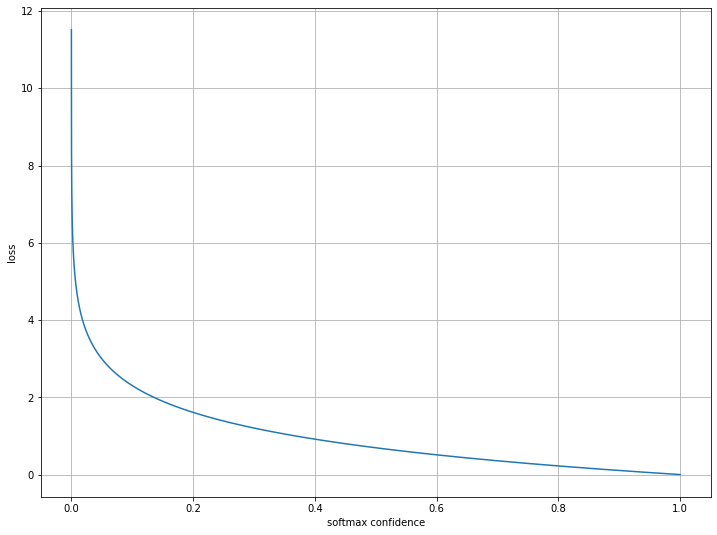

In [23]:
plt.plot(softmax_values, loss)

plt.xlabel('softmax confidence')
plt.ylabel('loss')

plt.grid(axis = 'both')
plt.show()

### Log


Any mention of _**log**_ will always be a **natural logarithm** throughout this book. 

The natural log represents the solution for the x-term in the equation e^x = b. 

For example, e^x = 5.2 is solved by log(5.2)

In [24]:
b = 5.2
print(np.log(b))

1.6486586255873816


In [25]:
print(math.e ** 1.6486586255873816)

5.199999999999999


### Example 2 - With Batch

#### Setup

In [26]:
softmax_outputs = np.array(
    [
        [0.7, 0.1, 0.2],
        [0.1, 0.5, 0.4],
        [0.02, 0.9, 0.08]
    ]
)

class_targets = [0, 1, 1]


#### multidimensional filter

In [27]:
softmax_outputs.shape

(3, 3)

In [29]:
dim_0_filter = [0, 1, 2]


In [31]:
softmax_outputs[dim_0_filter]

array([[0.7 , 0.1 , 0.2 ],
       [0.1 , 0.5 , 0.4 ],
       [0.02, 0.9 , 0.08]])

In [40]:
dim_1_filter = class_targets

softmax_outputs[dim_0_filter, dim_1_filter]

array([0.7, 0.5, 0.9])

**Even Better:**

In [42]:
softmax_outputs[
    range(len(softmax_outputs)), 
    class_targets
]

array([0.7, 0.5, 0.9])

#### Negative Log Loss

In [44]:
-np.log(
    softmax_outputs[
        range(len(softmax_outputs)), 
        class_targets
    ]
)

array([0.35667494, 0.69314718, 0.10536052])

#### Avg Loss per Batch

In [45]:
-np.log(
    softmax_outputs[
        range(len(softmax_outputs)), 
        class_targets
    ]
).mean()

0.38506088005216804

#### Variation when one-hot encoded

Let's add a check if `class_targets` are one-hot encoded and handle it a bit differently.

In [47]:
softmax_outputs = np.array(
    [
        [0.7, 0.1, 0.2],
        [0.1, 0.5, 0.4],
        [0.02, 0.9, 0.08]
    ]
)

class_targets = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0]
    ]
)

**Note what happens when we multiply the two:** 

In [49]:
softmax_outputs * class_targets

array([[0.7, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.9, 0. ]])

**What our `if` will look like:**

In [50]:
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)),
        class_targets
    ]
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs*class_targets,
        axis=1
    )

In [52]:
neg_log = -np.log(correct_confidences)

average_loss = np.mean(neg_log)

average_loss

0.38506088005216804

### Handling input of 0

#### log(0) is undefined

There is no `y` resulting in `e^y=0`. This means the `log(0)` is undefined.

In [54]:
math.log(0)

ValueError: ignored


What’s the result for a value very close to 0? We can calculate the limit of a function. 

![](https://drive.google.com/uc?id=19DuA58_upc8bfCllzmrBhCoXQXYNVxfe)

We read it as: "the limit of a natural logarithm of x, with x approaching 0 from a positive (it is 
impossible to calculate the natural logarithm of a negative value) equals negative infinity" 



#### In Python


If `-np.log(0)` equals inf, is it possible to calculate e to the power of negative infinity with Python?


In [55]:
np.e**(-np.inf)

0.0

#### Not good solution for loss func

Not good solution: add a very small value to the confidence to prevent it from being a zero.

Reason: when the model is fully correct in a prediction and puts all the confidence in the correct label, loss becomes a negative value instead of being 0!

In other words, we can't allow inputs into our **Negative Log Loss** function greater than 1.

In [58]:
small_num = 1e-7

In [60]:
print(np.log(1))
print(-np.log(1))

0.0
-0.0


In [69]:
new_log = np.log(1 + small_num)


print(f'new_log: {new_log:.8f}')

print(f'negative new_log: {-new_log:.8f}')

new_log: 0.00000010
negative new_log: -0.00000010


#### Good solution for loss func

It’s better to clip values from both sides by the same number, 1e-7 in our case. 

That means that the lowest possible value will become 1e-7 and the highest possible value will become 1-1e-7.

---

Here's how clip works:
- Any value < 1e-7 will become 1e-7 
- Any value > 1-1e-7 will become 1-1e-7

In [71]:
softmax_outputs = [0, 1e-7, 0.2, 0.3, .9, 1 - 1e-7, 1]


clipped = np.clip(softmax_outputs, 1e-7, 1 - 1e-7)

clipped

array([1.000000e-07, 1.000000e-07, 2.000000e-01, 3.000000e-01,
       9.000000e-01, 9.999999e-01, 9.999999e-01])

In [72]:
for c in clipped:
    print(f'clipped value: {c:.8f}')

clipped value: 0.00000010
clipped value: 0.00000010
clipped value: 0.20000000
clipped value: 0.30000000
clipped value: 0.90000000
clipped value: 0.99999990
clipped value: 0.99999990


In [75]:
np.clip(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    2,
    7
)

array([2, 2, 2, 3, 4, 5, 6, 7, 7, 7, 7])

## Full code up to this point

### Setup

In [78]:
!pip install nnfs

In [79]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

### Code

Note: in the later chapters, we’ll be adding more loss functions and some of the operations that we’ll be performing are common for all of them. One of these operations is how we calculate the overall loss — no matter which loss function we’ll use, **the overall loss is always a mean value of all sample losses**.

#### Dense layer

In [80]:
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):        
        self.output = np.dot(inputs, self.weights) + self.biases

#### ReLU activation

In [81]:
class Activation_ReLU:
    
    def forward(self, inputs):        
        self.output = np.maximum(0, inputs)

#### Softmax activation

In [82]:
class Activation_Softmax:
    
    def forward(self, inputs):

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

#### Common loss class

In [83]:
class Loss:

    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

#### Cross-entropy loss (inherits from loss)

In [84]:
class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)


        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

### Create model architecture

In [85]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

### Run forward pass

In [86]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

In [87]:
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y)

In [88]:
print('loss:', loss)

loss: 1.0986176


## Accuracy Calculation


While **loss** is a useful metric for **optimizing** a model, the metric commonly used in practice, along with loss, is the **accuracy**. 

Accuracy describes how often the largest confidence is the correct class in terms of a fraction.

Note, we don't use this metric for optimization etc. but rather as a metric to keep track of.

### Example usage

In [89]:

softmax_outputs = np.array([[0.7, 0.2, 0.1],
                            [0.5, 0.1, 0.4],
                            [0.02, 0.9, 0.08]])

class_targets = np.array([0, 1, 1])

In [90]:
predictions = np.argmax(softmax_outputs, axis=1)

predictions

array([0, 0, 1])

In [92]:
predictions == class_targets

array([ True, False,  True])

In [94]:
np.mean(predictions==class_targets)

# np.mean() casts it to [1, 0, 1] and calculates mean, which is 0.(6)

0.6666666666666666

### Adding to end of our full code above

In [95]:
predictions = np.argmax(activation2.output, axis=1)

# If targets are one-hot encoded, convert them:
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

acc: 0.34
